In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [19]:
os.chdir("../brain-mri-images-for-brain-tumor-detection/")

In [3]:
yes=os.listdir('./brain_tumor_dataset/yes')
no=os.listdir('./brain_tumor_dataset/no')

In [4]:
X_data =[]
for file in yes:
    img = cv2.imread('./brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

for file in no:
    img = cv2.imread('./brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [5]:
X = np.squeeze(X_data)
X.shape

(253, 224, 224, 3)

In [6]:
#show one training sample
from matplotlib import pyplot as plt
plt.imshow(X[5], interpolation='nearest')
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
# normalize data
X = X.astype('float32')
X /= 255

In [8]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
len(data_target)

253

In [10]:
#split data
lenght = len(data_target)
index = np.arange(0,lenght,1)
len_train = round(lenght*0.7)
len_test = lenght - len_train
print ("train size :",len_train," test_size :",len_test)

train size : 177  test_size : 76


In [11]:
from random import sample
X_train, y_train, X_test, y_test = [],[],[],[]
test_index = sample(set(index), len_test)

for i in range(lenght):
    if i not in test_index:
        X_train.append(X[i])
        y_train.append(data_target[i])
    else:
        X_test.append(X[i])
        y_test.append(data_target[i])

X_train = np.squeeze(X_train)
y_train = np.asarray(y_train)
#y_train = np.squeeze(y_train)
X_test = np.squeeze(X_test)
y_test = np.asarray(y_test)
#y_test = np.squeeze(y_test)

print("X_train :",X_train.shape,
      "y_train :",y_train.shape,
     "\nX_test :",X_test.shape,
     "y_test :",y_test.shape)

X_train : (177, 224, 224, 3) y_train : (177,) 
X_test : (76, 224, 224, 3) y_test : (76,)


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam

from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train.shape

(177, 2)

<h2>VGG 16<h2>

In [15]:
model_vgg = VGG16(weights=None, include_top=False, input_shape = (224, 224, 3))#default imagenet

#for layer in model.layers[:5]:
#    layer.trainable = True

x = model_vgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
final = Dense(2, activation="sigmoid")(x)
model_final = Model(input = model_vgg.input, output = final)
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [16]:
model_final.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['acc'])

In [17]:
hist = model_final.fit(X_train,y_train,
         batch_size=32,
         epochs=10,
         validation_data=(X_test, y_test))

Train on 177 samples, validate on 76 samples
Epoch 1/10
177/177 [==============================] - 129s 731ms/step - loss: 0.8778 - acc: 0.5819 - val_loss: 0.6783 - val_acc: 0.6053
Epoch 2/10
177/177 [==============================] - 122s 691ms/step - loss: 0.7670 - acc: 0.6158 - val_loss: 0.6784 - val_acc: 0.6053
Epoch 3/10
177/177 [==============================] - 128s 722ms/step - loss: 0.6815 - acc: 0.6158 - val_loss: 0.6803 - val_acc: 0.6053
Epoch 4/10
177/177 [==============================] - 126s 712ms/step - loss: 0.6740 - acc: 0.6158 - val_loss: 0.6723 - val_acc: 0.6053
Epoch 5/10
177/177 [==============================] - 124s 703ms/step - loss: 0.6690 - acc: 0.6158 - val_loss: 0.6710 - val_acc: 0.6053
Epoch 6/10
177/177 [==============================] - 116s 653ms/step - loss: 0.6701 - acc: 0.6158 - val_loss: 0.6719 - val_acc: 0.6053
Epoch 7/10
177/177 [==============================] - 108s 612ms/step - loss: 0.6661 - acc: 0.6158 - val_loss: 0.6709 - val_acc: 0.6053
Epo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


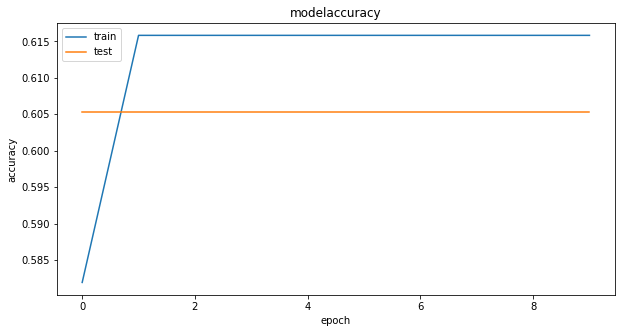

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


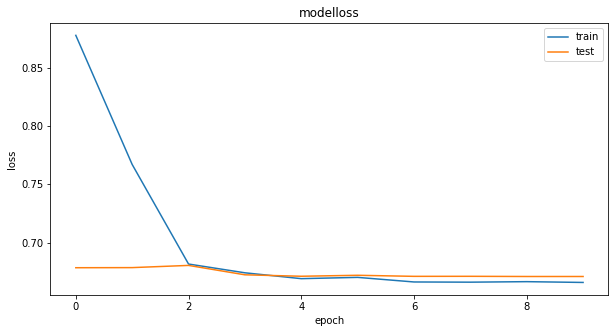

In [18]:
def draw_history(history,figsize=(10,5)):
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('modelaccuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('modelloss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    
draw_history(hist)

**VGG16 Transfer Learning **

In [21]:
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape = (224, 224, 3))#default imagenet

#for layer in model.layers[:5]:
#    layer.trainable = True

x = model_vgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
final = Dense(2, activation="sigmoid")(x)
model_final = Model(input = model_vgg.input, output = final)
model_final.summary()

58892288/58889256 [==============================] - 43s 1us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [22]:
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape = (224, 224, 3))#default imagenet

#for layer in model.layers[:5]:
#    layer.trainable = True

x = model_vgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
final = Dense(2, activation="sigmoid")(x)
model_final = Model(input = model_vgg.input, output = final)
model_final.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [23]:
model_final.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['acc'])

In [24]:
hist = model_final.fit(X_train,y_train,
         batch_size=32,
         epochs=10,
         validation_data=(X_test, y_test))

Train on 177 samples, validate on 76 samples
Epoch 1/10
177/177 [==============================] - 101s 569ms/step - loss: 0.9731 - acc: 0.5254 - val_loss: 0.6931 - val_acc: 0.3947
Epoch 2/10
177/177 [==============================] - 114s 643ms/step - loss: 0.6931 - acc: 0.3842 - val_loss: 0.6931 - val_acc: 0.3947
Epoch 3/10
177/177 [==============================] - 113s 641ms/step - loss: 0.6931 - acc: 0.3842 - val_loss: 0.6931 - val_acc: 0.3947
Epoch 4/10
177/177 [==============================] - 114s 644ms/step - loss: 0.6931 - acc: 0.3842 - val_loss: 0.6931 - val_acc: 0.3947
Epoch 5/10
177/177 [==============================] - 112s 632ms/step - loss: 0.6931 - acc: 0.3842 - val_loss: 0.6931 - val_acc: 0.3947
Epoch 6/10
177/177 [==============================] - 112s 633ms/step - loss: 0.6931 - acc: 0.3842 - val_loss: 0.6931 - val_acc: 0.3947
Epoch 7/10
177/177 [==============================] - 111s 629ms/step - loss: 0.6931 - acc: 0.3842 - val_loss: 0.6931 - val_acc: 0.3947
Epo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


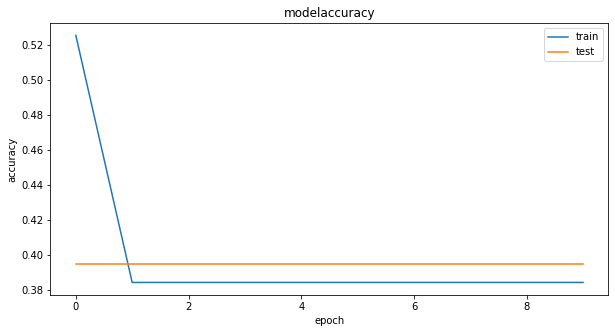

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


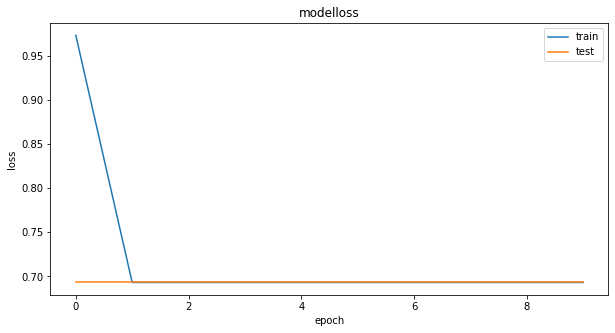

In [25]:
def draw_history(history,figsize=(10,5)):
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('modelaccuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('modelloss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    
draw_history(hist)